In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('C:\\Users\\Dell\\Downloads\\Recommendation System\\Recommendation System\\anime.csv')

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values in 'genre' and 'type' columns
df.dropna(subset=['genre', 'type'], inplace=True)

# Replace missing values in 'rating' column with the mean rating
df['rating'].fillna(df['rating'].mean(), inplace=True)

# Check for missing values again
print(df.isnull().sum())

# Convert 'episodes' column to numeric, forcing errors to NaN and then dropping them
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df.dropna(inplace=True)

# Check for missing values again
print(df.isnull().sum())

# One-Hot Encoding for the 'genre' column
encoder = OneHotEncoder()
genre_encoded = encoder.fit_transform(df[['genre']])

# Convert the encoded genres into a dataframe
genre_df = pd.DataFrame(genre_encoded.toarray(), columns=encoder.get_feature_names_out(['genre']))

# Combine the one-hot encoded genres with the original dataframe
df = pd.concat([df, genre_df], axis=1)

# Drop the original 'genre' column
df.drop('genre', axis=1, inplace=True)

# Normalize 'rating' and 'members' columns
scaler = MinMaxScaler()
df[['rating', 'members']] = scaler.fit_transform(df[['rating', 'members']])

# Check for missing values again
print(df.isnull().sum())

# Select the features to compute similarity
feature_columns = list(genre_df.columns) + ['rating', 'members']

# Check for missing values in selected features
print(df[feature_columns].isnull().sum())

# Drop rows with missing values in selected features
df.dropna(subset=feature_columns, inplace=True)

# Compute cosine similarity
cosine_sim = cosine_similarity(df[feature_columns].values)

# Function to recommend anime based on cosine similarity
def recommend_anime(anime_name, num_recommendations=5, threshold=0.5):
    if anime_name not in df['name'].values:
        return "Anime not found in the dataset."
    
    # Find the index of the anime with the given name
    idx = df[df['name'] == anime_name].index[0]
    
    # Get the similarity scores for the target anime
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the anime based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Filter out anime with similarity scores below the threshold
    sim_scores = [score for score in sim_scores if score[1] > threshold]
    
    # Get the indices of the most similar anime
    sim_indices = [score[0] for score in sim_scores[1:num_recommendations+1]]
    
    # Return the names of the recommended anime
    return df['name'].iloc[sim_indices]

# Example usage
print(recommend_anime('Kimi no Na wa.', num_recommendations=5))

# Split the dataset into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Placeholder for evaluation function
def evaluate_recommendation_system():
    # In practice, you would evaluate the recommendations here.
    # For demonstration, we will just print a message.
    print("Evaluation function placeholder")

# Call the evaluation function
evaluate_recommendation_system()


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64
anime_id                                    380
name                                        380
type                                        380
episodes                                    380
rating                                      380
                                           ... 
genre_Super Power, Supernatural, Vampire    380
genre_Supernatural                          380
genre_Thriller                              380
genre_Vampire                               380
genre_Yaoi                                  380
Length: 3228, dtype: int64
genre_Action                                                     380
genre_Action, Adventure      

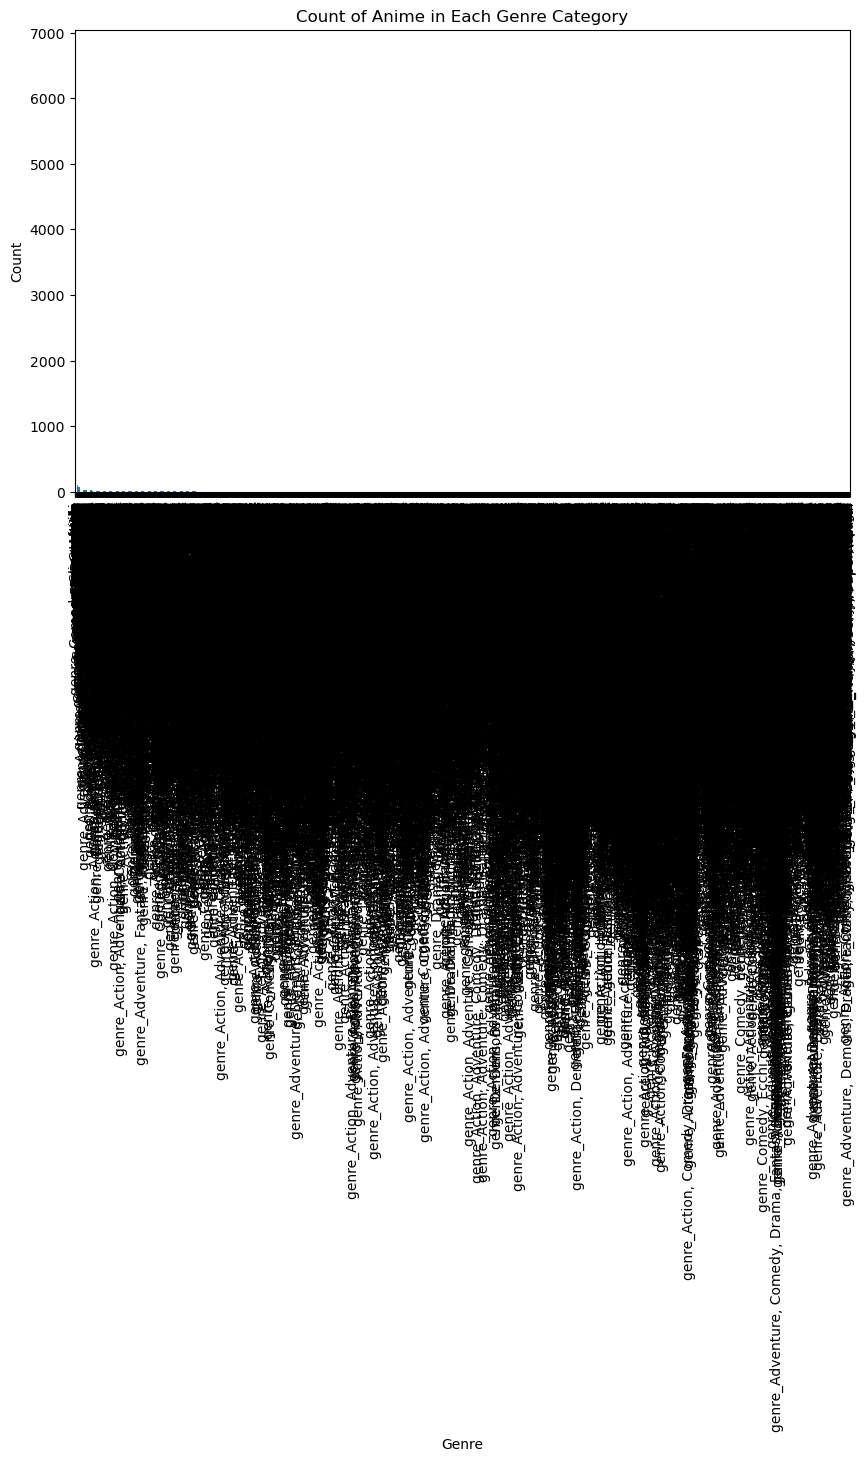

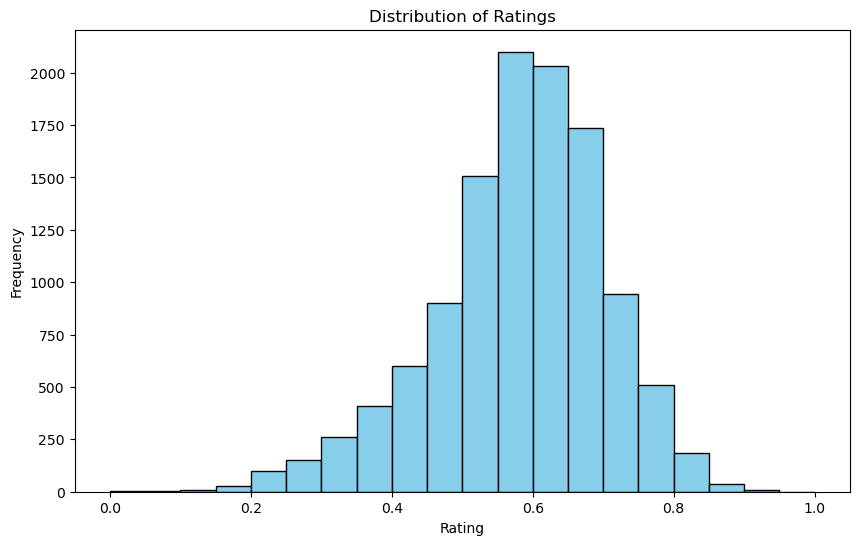

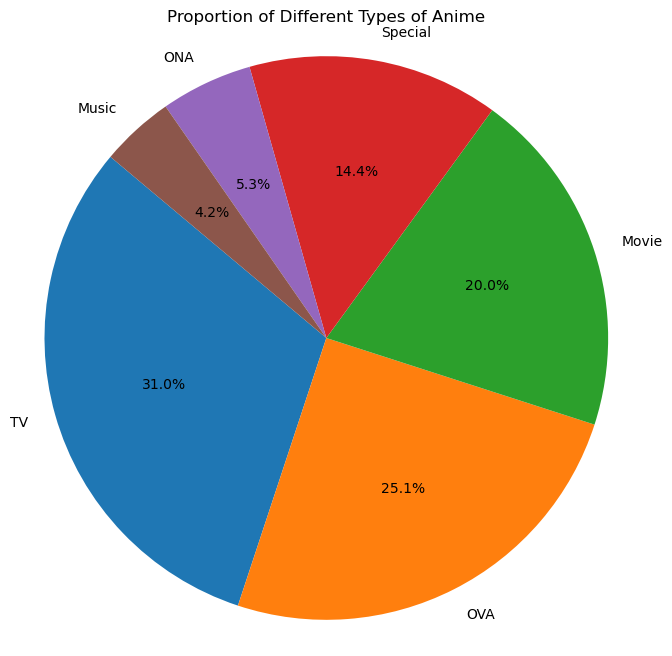

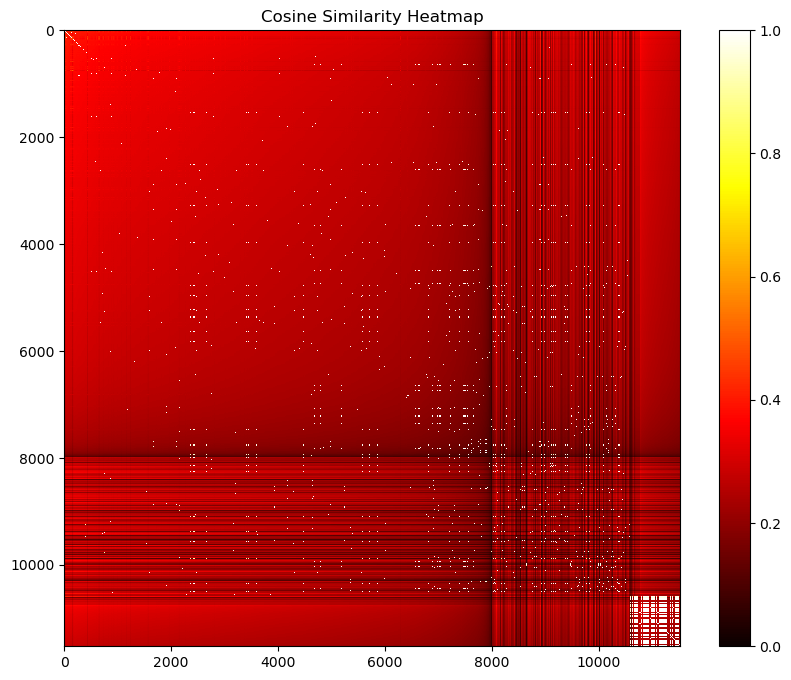

In [7]:
import matplotlib.pyplot as plt

# Bar chart for genre counts
genre_counts = df.sum()[4:-3]  # Assuming the genre columns start from index 4 and end 3 columns before the last
plt.figure(figsize=(10, 6))
genre_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Count of Anime in Each Genre Category')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Histogram for rating distribution
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Pie chart for types of anime
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Types of Anime')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Heatmap for cosine similarity scores (if calculated)
# Assuming cosine_sim is the variable containing cosine similarity scores
plt.figure(figsize=(10, 8))
plt.imshow(cosine_sim, cmap='hot', interpolation='nearest')
plt.title('Cosine Similarity Heatmap')
plt.colorbar()
plt.show()
